In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_71013_G')

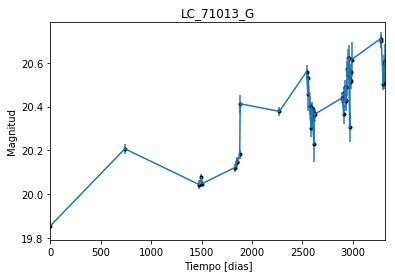

In [2]:
data = np.genfromtxt('LC_71013_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_71013_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

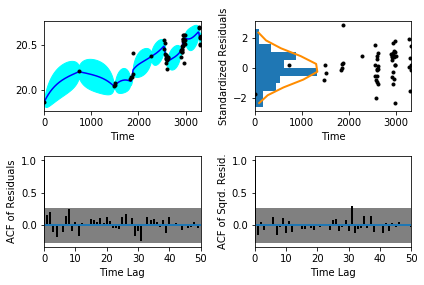

In [5]:
sample.assess_fit()

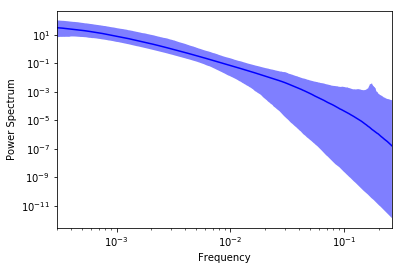

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_71013_G')

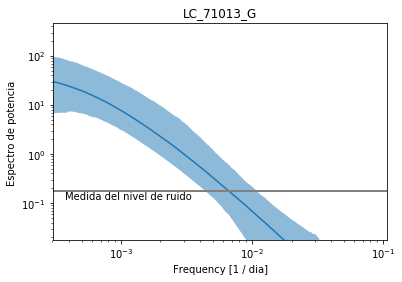

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_71013_G')

Text(0.5,1,'Prediccion , valor esperado 71013_G')

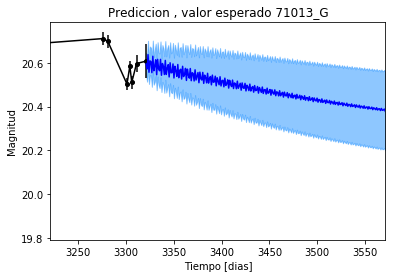

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 71013_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_71013_G')

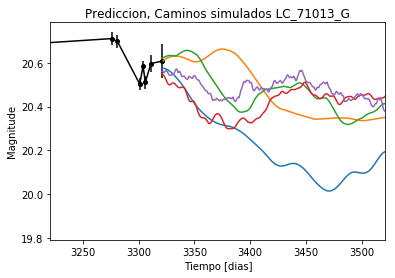

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_71013_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_71013_G')

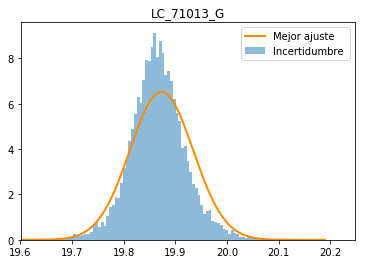

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_71013_G')

Text(0.5,1,'Interpolacion, camino simulado LC_71013_G')

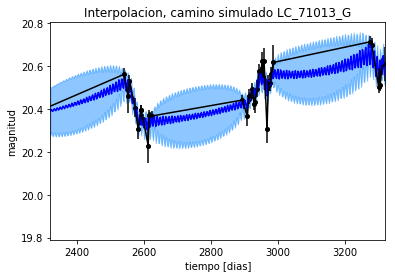

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71013_G')

Text(0.5,1,'Interpolacion, camino simulado LC_71013_G')

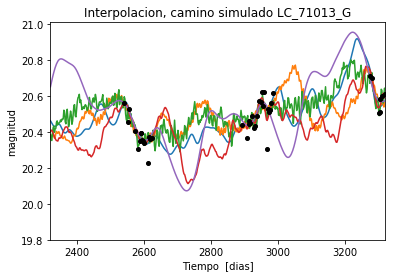

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71013_G')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 323.641391125
Median: 0.0183570979468
Standard deviation: 0.111063384135
68% credibility interval: [ 0.00206112  0.15046546]
95% credibility interval: [ 0.00043073  0.41803763]
99% credibility interval: [  3.28724435e-04   5.07782097e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 418.229099688
Median: 0.00915725329936
Standard deviation: 0.0712121163955
68% credibility interval: [ 0.00094289  0.062805  ]
95% credibility interval: [ 0.00033776  0.27580945]
99% credibility interval: [  3.09611576e-04   4.20147442e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 472.315413332
Median: 0.0552125024373
Standard deviation:

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 941.452734759
Median: 78.2504890516
Standard deviation: 2.00075892192
68% credibility interval: [ 76.08486323  79.71078867]
95% credibility interval: [ 73.23022576  81.43749159]
99% credibility interval: [ 71.3042685   82.14947915]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 262.286076501
Median: 0.971097872016
Standard deviation: 1.35783707517
68% credibility interval: [ 0.17977629  2.77201149]
95% credibility interval: [ 0.03980698  4.83144267]
99% credibility interval: [ 0.014986    6.47000754]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 511.149361941
Median: 1.10792541632
Standard deviation: 3.34120854706
68% credibility interval: [ 0.09988618  5.8178465 ]
95% credibility interval: [  8.81051415e-03

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6450.46965631
Median: 2.71252923272e-27
Standard deviation: 1.05097697634e+77
68% credibility interval: [  1.86842936e-71   4.95539848e-06]
95% credibility interval: [  3.22680299e-150   5.19213404e+040]
99% credibility interval: [  1.87267779e-169   1.72667633e+072]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1971.61100304
Median: 20.2597361911
Standard deviation: 0.125108490917
68% credibility interval: [ 20.14312431  20.37558485]
95% credibility interval: [ 20.00628932  20.50832007]
99% credibility interval: [ 19.91226432  20.6147687 ]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 291.208473913
Median: 0.0875517835828
Standard deviation: 0.150031176409
68% credibility interval: [ 0.          0.34100444]
95% credibility interval: [ 0.          0.47114296]
99% credibility interval: [ 0.          0.51783559]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 291.208473913
Median: 0.0875517835828
Standard deviation: 0.150031176409
68% credibility interval: [ 0.          0.34100444]
95% credibility interval: [ 0.          0.47114296]
99% credibility interval: [ 0.          0.51783559]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1354.9731472
Median: 0.0
Standard deviation: 0.000310070525602
68% cre

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 941.452734759
Median: 78.2504890516
Standard deviation: 2.00075892192
68% credibility interval: [ 76.08486323  79.71078867]
95% credibility interval: [ 73.23022576  81.43749159]
99% credibility interval: [ 71.3042685   82.14947915]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1183.31735675
Median: 0.0648613469556
Standard deviation: 0.0524669222571
68% credibility interval: [ 0.04172902  0.10584772]
95% credibility interval: [ 0.02920719  0.2018599 ]
99% credibility interval: [ 0.02316782  0.33378265]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 333.586607011
Median: 1.37318820231
Standard deviation: 0.260161540403
68% credibility interval: [ 1.11519176  1.66058262]
95% credibility interval: [ 0.90530078  1.91037003]
99% credibility interval: [ 0.79888215  1.97728847]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2205.95238627
Median: 0.0024604078351
Standard deviation: 0.0638708511486
68% credibility interval: [  7.33965105e-05   4.26253624e-02]
95% credibility interval: [  1.77155136e-44   2.09050940e-01]
99% credibility interval: [  1.77964306e-75   3.89279929e-01]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 323.641391125
Median: (-0.115341048102-1.46472001586j)
Standard deviation: 1.17286100061
68% credibility interval: [-0.94540237-1.08598481j -0.01295042-0.82228061j]
95% credibility interval: [-2.62660787-0.05742249j -0.00270636-0.01740598j]
99% credibility interval: [ -3.19048901e+00+0.j          -2.06543654e-03-0.04503333j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 418.229099688
Median: (-0.0575367193847+1.23224736523j)
Standard deviation: 1.04347269407
68% credibility interval: [-0.39461545+2.07024985j -0.00592437+0.j        ]
95% credibility interval: [-1.73296186+1.08702992j -0.00212221+0.j        ]
99% credibility interval: [ -2.63986423e+00+2.27887097j  -1.94534690e-03+0.06410506j]
Posterior summary for par